# Project: 'tmdb-movies' Dataset investigation
### Table of content

- Introduction
- Data Wrangling
- Exploratory Data Analysis
- Conclusion

# Introduction

This project make use of the tmdb-movies dataset to investigate the interaction between different movies, its audience and the productions using characteristics in the Dataset. During the process, the dataset is check, clean, analysed and visualized to answer some posed questions which are underlisted. 
As conclusion the results of the analysis is comunicated including the limitations faced.

- What is the trend of number of movies produced per year?
- Are there more Profits than Losses in the Dataset?
- What are the 10 longest movies and check if each make profits or loss?
- What are the 10 most popular movies and their release dates, check also whether they end up in Profit or Loss?
- What is the distribution of Average Returns by Months?
- What are the top 10 years with highest average Returns and the least 10 years with lowest Average Returns?
- Number of Movies Produced per Month grouped by return?
- What is the correllation between the following Numberical Columns?
. Popularity
. Budget
. Runtime
. Vote_count and
 Returns

In [224]:
#this cell contains the statements used to import the packages that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## Data Wrangling

This section consists of two parts. Namely; Data inspection and Data cleaning. On the inspection part, the dataset is inspected using certain operations and check for anomalies. Data cleaning on the other side get the data ready for exploratory analysis and insights

### Data Inspection

In [225]:
#load Dataset as df
df = pd.read_csv('tmdb-movies.csv')

In [226]:
# check the number of rows and columns and the data types
df.shape

(10866, 21)

In [227]:
# check the information about the data
# also to check for any missing values and duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

This Dataset cointains 10866 rows and 21 columns. Meanwhile some of the columns consist of missing values. This will be taken care of as we preoceed.

In [228]:
# check for data description to otain some mathematical concepts of the numerical columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The above table shows some statistical values of the numerical columns. For example, the maximum and minimum Budgets, Revenue and so on.

In [229]:
#display few elements of the dataset

df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data Cleaning

After the dataset is thoroughly wrangled, and some anomalies are detected. the next important step is to 
clean the dataset to make it best suited to explore. Here, some less important columns will be dropped,
duplicates will also be removed as far as they contain similar details. However, new columns will be created to further give more exploratory details. 

In [230]:
# check for duplicates

df['id'].nunique()

10865

There are 10865 unique id values out of the total 10866 inputs.
That means a row is duplicated.

In [231]:
#further inspection to fix out the duplicated row

df['id'].value_counts()

42194     2
16384     1
745       1
17037     1
72334     1
         ..
11615     1
251232    1
112205    1
101731    1
9600      1
Name: id, Length: 10865, dtype: int64

It can be seen above that id_number 42194 is duplicated

In [232]:
# now we check for their columns identities

df[df['id'] == 42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [233]:
#to further confirm using an inbuilt function

df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Since the two rows are identical in values and the duplicated function further confirms that, one is dropped

In [234]:
#drop the duplicated row 

df.drop_duplicates(inplace=True)

In [235]:
# check again the information of the dataset to comfirm if the duplicated column is dropped

df.shape

(10865, 21)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

The Duplicated row has been sucessfully dropped.

In [237]:
#check for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are few columns with large missing values. I will like to drop them to make the dataset more ready and suited based on the following reasons:

     >> I remove the columns which are not really needed for this analysis. 
     >> I drop the director and genres columns because of large numbers of null values

In [238]:
#drop columns
col_label = ['imdb_id', 'homepage', 'tagline', 'cast', 'overview', 'director', 'genres', 'keywords', 'production_companies', 'budget_adj',  'revenue_adj']

df.drop(col_label, axis=1, inplace=True)


In [239]:
#check dataset new information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  int64  
 3   revenue         10865 non-null  int64  
 4   original_title  10865 non-null  object 
 5   runtime         10865 non-null  int64  
 6   release_date    10865 non-null  object 
 7   vote_count      10865 non-null  int64  
 8   vote_average    10865 non-null  float64
 9   release_year    10865 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 933.7+ KB


Now we have a cleaned data set with neither Duplicates nor null or missing values

In [240]:
# convert the release_date column to time date 

df['release_date'] = pd.to_datetime(df['release_date'])

In [241]:
# new column named release_month will be created to know which month of the year irrespective of the year the movie is produced

df['release_month'] = pd.DatetimeIndex(df['release_date']).month

In [242]:
#convert the month from number form to month name form for better visualization

month_num = [0,1,2,3,4,5,6,7,8,9,10,11,12]
month_str = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['release_month1'] = pd.cut(df['release_month'], month_num, labels=month_str)

In [243]:
df.head(5)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,release_month,release_month1
0,135397,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,6,June
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,5,May
2,262500,13.112507,110000000,295238201,Insurgent,119,2015-03-18,2480,6.3,2015,3,March
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,12,December
4,168259,9.335014,190000000,1506249360,Furious 7,137,2015-04-01,2947,7.3,2015,4,April


In [244]:
df.query('budget == 0')

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,release_month,release_month1
30,280996,3.927333,0,29355203,Mr. Holmes,103,2015-06-19,425,6.4,2015,6,June
36,339527,3.358321,0,22354572,Solace,101,2015-09-03,474,6.2,2015,9,September
72,284289,2.272044,0,45895,Beyond the Reach,95,2015-04-17,81,5.5,2015,4,April
74,347096,2.165433,0,0,Mythica: The Darkspore,108,2015-06-24,27,5.1,2015,6,June
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,105,2015-06-12,569,7.7,2015,6,June
...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,0.087034,0,0,Carry On Screaming!,87,2066-05-20,13,7.0,1966,5,May
10861,21,0.080598,0,0,The Endless Summer,95,2066-06-15,11,7.4,1966,6,June
10862,20379,0.065543,0,0,Grand Prix,176,2066-12-21,20,5.7,1966,12,December
10863,39768,0.065141,0,0,Beregis Avtomobilya,94,2066-01-01,11,6.5,1966,1,January


The month of production is extracted and converted to Month Names in separate column. The release_month in number form, will be dropped because we already have month names.

In [245]:
#drop the column with just months numbers

df.drop('release_month', axis=1, inplace=True)

df.rename(columns={'release_month1':'release_month'}, inplace=True)

Another important column i will like to create is the Returns column = Revenue - Budget

In [246]:
# creation of new column named returns = revenue - budget

df['returns'] = df['revenue'] - df['budget']

In [247]:
#check if there is loss
df_profit = df[df['returns'] > 0]
df_loss = df[df['returns'] < 0]
df_loss.count()

id                2387
popularity        2387
budget            2387
revenue           2387
original_title    2387
runtime           2387
release_date      2387
vote_count        2387
vote_average      2387
release_year      2387
release_month     2387
returns           2387
dtype: int64

Some Returns resulted in loss. because they are less than zero. Total number of 2387 rows resulted into loss.

In [248]:
#check for zero returns. these are neither profit nor loss
df[df['returns'] == 0].count()

id                4705
popularity        4705
budget            4705
revenue           4705
original_title    4705
runtime           4705
release_date      4705
vote_count        4705
vote_average      4705
release_year      4705
release_month     4705
returns           4705
dtype: int64

Some Returns resulted in zeros. Total number of 47055 rows resulted into zeros returns.

##### Its shown that, there are losses. then it is easier to categorize into two variable columns. Profit or Loss Column, the zero returns will be categorized as Loss because to produced a movie, one or two expenses would have been made even without budget , like man powers. so having a zero returns is a Loss

In [249]:
# check for minimum returns
df.returns.min()

-413912431

In [250]:
# check for maximum returns
df.returns.max()

2544505847

Categorizing the returns column into 'Profit' and 'Loss'

In [251]:
#i used 0.1 here because there columns with 0 returns. so i classify them as loss

returns = [-413912431, 0.1, 2544505847]
pnl = ['Loss', 'Profit']
df['profit_or_loss'] = pd.cut(df['returns'], returns, labels=pnl)


In [252]:
df.head(5)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,release_month,returns,profit_or_loss
0,135397,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,June,1363528810,Profit
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,May,228436354,Profit
2,262500,13.112507,110000000,295238201,Insurgent,119,2015-03-18,2480,6.3,2015,March,185238201,Profit
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,December,1868178225,Profit
4,168259,9.335014,190000000,1506249360,Furious 7,137,2015-04-01,2947,7.3,2015,April,1316249360,Profit


## Exploratory Data Analysis

In this section, our inspected and cleaned dataset will be explored to answer some posed questions and also give it a visualization for better understanding.

### Research Question 1: What is the trend of number of movies produced per year?

In [253]:
# create a variable yearly_movie and count the number of movies for each

yearly_movie = df.groupby('release_year').count()

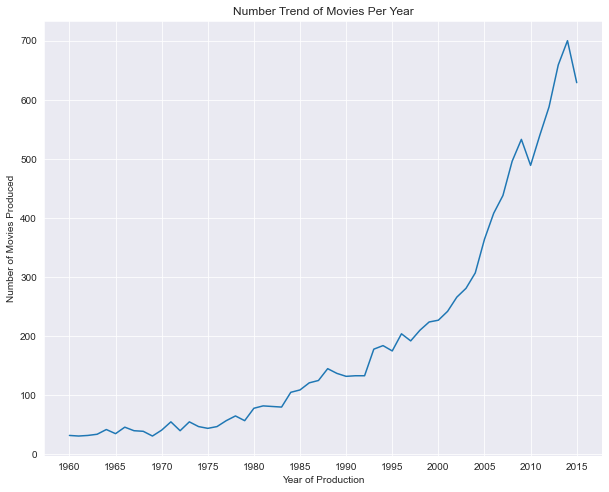

In [254]:
#create a plot to visualize the trend of this record

fig = plt.figure(figsize=(10,8))
plt.plot(yearly_movie['id'].index, yearly_movie['id'].values)
plt.xticks(np.arange(1960, 2020, 5))
plt.title('Number Trend of Movies Per Year')
plt.xlabel('Year of Production')
plt.ylabel('Number of Movies Produced');

##### According to the visualization above, we can see that, as the year pass by, the number of movies produced keep increasing. Therefore the trend is INCREASING

### Research Question 2: Are there more Profits than Losses in the Dataset?

In [255]:
# create value count for each return
df['profit_or_loss'].value_counts()

Loss      7091
Profit    3773
Name: profit_or_loss, dtype: int64

In [256]:
profit_num = df['profit_or_loss'].value_counts().values[0]
loss_num = df['profit_or_loss'].value_counts().values[1]

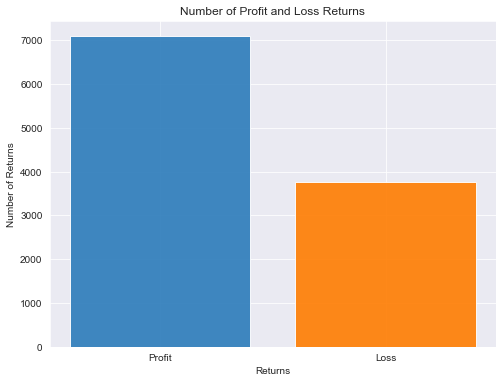

In [257]:
# create fig size for the plot
fig = plt.figure(figsize=(8,6))

#plotting variables/arguments
locations = [1,2]
labels = ['Profit', 'Loss']
heights = [profit_num, loss_num]

# creating a visualization using bar plot
plt.bar(locations, heights, tick_label=labels, color=['#2b7bba', '#ff7c00'], alpha=0.9)
plt.title('Number of Profit and Loss Returns')
plt.xlabel('Returns')
plt.ylabel('Number of Returns');

From the representation above, it shows this dataset consists of more profits(7091) than losses(3773). Meanwhile there are some rows with 0 returns. but i assumed them as loss, because producing a movie with 0 return is a total Loss.

### Research Question 3: What are the 10 longest movies and check if each make profits or loss?

In [258]:
#create sub-dataset 'lm' consisting of columns(original_title, runtime and profit_or_loss)
lm = df[['original_title', 'runtime', 'profit_or_loss', 'popularity']]

#sorting the column runtime to extract 10 longest movies

lm = lm.sort_values('runtime', ascending=False, ignore_index=True)
lm.iloc[:10]

,original_title,runtime,profit_or_loss,popularity
0,The Story of Film: An Odyssey,900,Loss,0.006925
1,Taken,877,Loss,0.469332
2,Band of Brothers,705,Profit,0.537593
3,Shoah,566,Loss,0.147489
4,"North and South, Book I",561,Loss,0.000065
5,Planet Earth,550,Loss,0.137913
6,The Pacific,540,Loss,0.757082
7,John Adams,501,Loss,0.136540
8,Life,500,Loss,0.102223
9,Generation Kill,470,Loss,0.336308


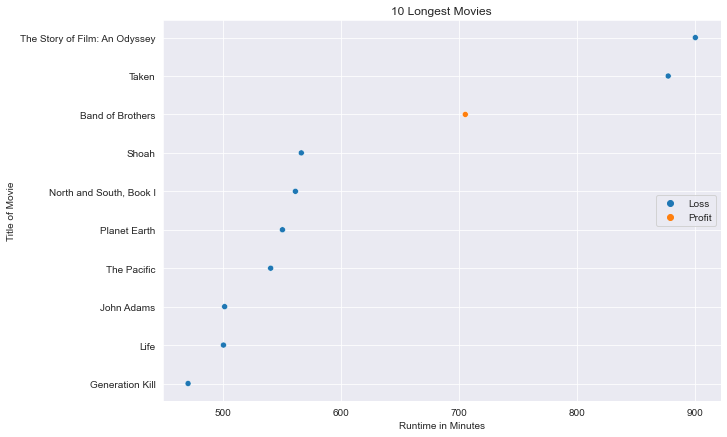

In [259]:
#create canvas size
plt.figure(figsize=(10,7))

#visualize using seaborn scatterplot
sns.scatterplot(x='runtime', y='original_title', data=lm.iloc[:10], hue='profit_or_loss')

#set title and labels
plt.title('10 Longest Movies')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Title of Movie')
plt.legend(loc='right');

##### The 10 longest Movies run more than 7 hours(420 minutes), almost with Loss Returns and very low popularity. This could be seasonal movies and people dont want to invest so much time in movies with longer runtime

### Research Question 4: What are the 10 most popular movies and their release dates, check also whether they end up in Profit or Loss ? 

In [260]:
#sort the dataset by popularity
sort_pop = df.sort_values('popularity',ascending=False, ignore_index=True)

#grab the first 10 popular movies
top_movies = sort_pop.iloc[:10][['popularity', 'original_title', 'runtime', 'vote_count', 'vote_average', 'release_year', 'release_month', 'profit_or_loss']]
top_movies

,popularity,original_title,runtime,vote_count,vote_average,release_year,release_month,profit_or_loss
0,32.985763,Jurassic World,124,5562,6.5,2015,June,Profit
1,28.419936,Mad Max: Fury Road,120,6185,7.1,2015,May,Profit
2,24.949134,Interstellar,169,6498,8.0,2014,November,Profit
3,14.311205,Guardians of the Galaxy,121,5612,7.9,2014,July,Profit
4,13.112507,Insurgent,119,2480,6.3,2015,March,Profit
5,12.971027,Captain America: The Winter Soldier,136,3848,7.6,2014,March,Profit
6,12.037933,Star Wars,121,4428,7.9,1977,March,Profit
7,11.422751,John Wick,101,2712,7.0,2014,October,Profit
8,11.173104,Star Wars: The Force Awakens,136,5292,7.5,2015,December,Profit
9,10.739009,The Hunger Games: Mockingjay - Part 1,123,3590,6.6,2014,November,Profit


##### Visualizing 10 most popular Movies

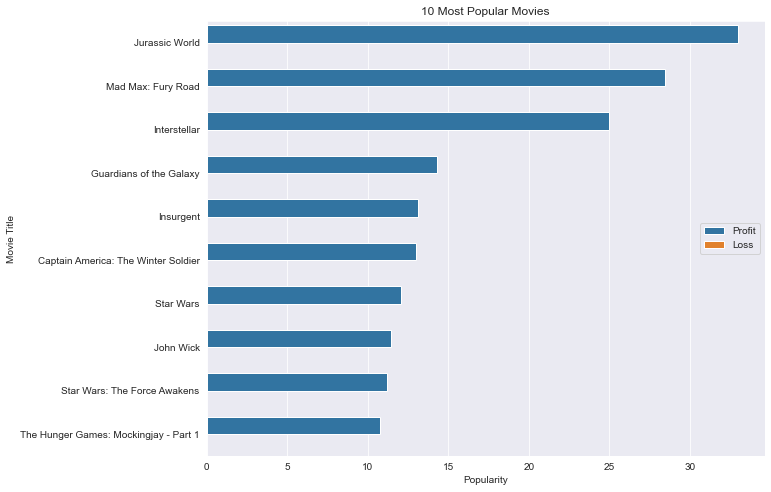

In [261]:
#create canvas size
fig = plt.figure(figsize=(10,8))

#create a barh plot
sns.barplot(x='popularity', y='original_title', hue='profit_or_loss', data=top_movies, orient='h', hue_order=['Profit', 'Loss'])

#set title and labels
plt.title('10 Most Popular Movies')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.legend(loc='right');

###### 'Jurassic World' is the Most popular movie followed by 'Max Max; Fury Road' while 'The Hunger Game' is the 10th most popular movie. All the 10 most popular movies generated profitable Returns

### Research Question 5: What is the distribution of Average Returns by Months

In [262]:
#get the mean values of returns by month
avg_monthly_returns = df.groupby('release_month').mean()['returns']

#print avg_monthly_returns
avg_monthly_returns

release_month
January      7.299410e+06
February     1.523901e+07
March        2.346622e+07
April        1.986922e+07
May          4.257437e+07
June         5.279089e+07
July         3.765463e+07
August       1.566722e+07
September    9.989658e+06
October      1.416368e+07
November     3.752400e+07
December     3.931195e+07
Name: returns, dtype: float64

#### Create a Funtion to avoid Code Repitition 

In [263]:
#create a function that returns the index of a series
def s_index(x):
    index = x.index
    return index

#create a function that returns the values of a series

def s_value(y):
    values = y.values
    return values


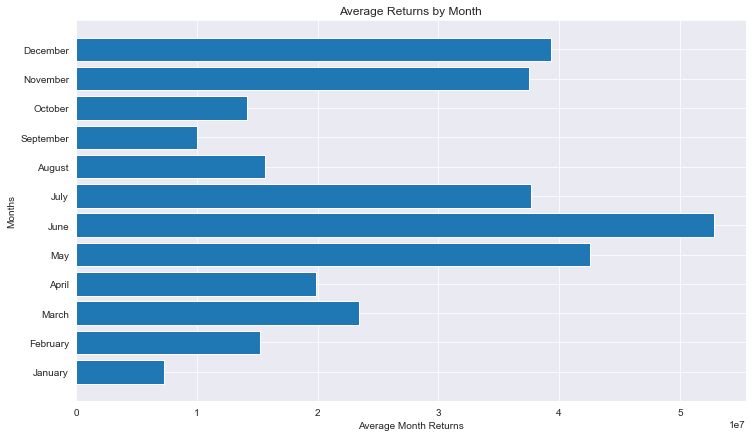

In [264]:
#create the size of the plot
fig = plt.figure(figsize=(12,7))

#set location from 1-12, since we have just 12 months
locations = np.arange(1,13,1)

#create labels for x-axis(year) by calling the functon (s_index) created above
labels= s_index(avg_monthly_returns)

#create heights for each bar (returns) by calling the function (s_value)
heights = s_value(avg_monthly_returns)
    
# create barh plot to visualize this reult
plt.barh(locations, heights, tick_label=labels)

#set title and labels
plt.title('Average Returns by Month')
plt.xlabel('Average Month Returns')
plt.ylabel('Months');

#### The Month of June has the highest monthly average returns, it can be deduced that the warm time of the year has high tendency to generate high returns on investment because people can leave there house to visit friends, cinemas and so on to make engagements. 

### Research Question 6:  What are the top 10 years with highest average Returns and the least 10 years with lowest Average Returns?

In [265]:
# average returns by release year
avg_returns = df.groupby('release_year').mean()

#sorting the avg_returns in descending order for easy slicing
s_avg_returns = avg_returns['returns'].sort_values(ascending=False)

#create the variable of top 10 returns and lowest 10 returns by slicing 
h_returns = s_avg_returns.iloc[:10]
l_returns = s_avg_returns.iloc[-10:]

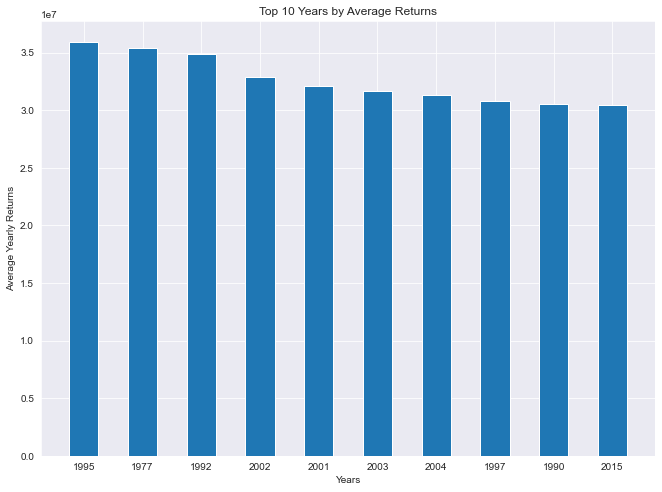

In [266]:
#create size for the plot
fig = plt.figure(figsize=(11,8))

#set location from 1-10, since we are after top 10 values
locations = np.arange(1,11)

#create labels for x-axis(year) by calling the function s_index()
labels= s_index(h_returns)

#create heights for each bar (returns) by calling the function s_values()
heights = s_value(h_returns)

#create a bar plot to visualize this result
plt.bar(locations, heights, tick_label=labels, width=0.5)

#set title and labels
plt.title('Top 10 Years by Average Returns')
plt.xlabel('Years')
plt.ylabel('Average Yearly Returns');

#### Year 1995 has the highest yearly average returns. 

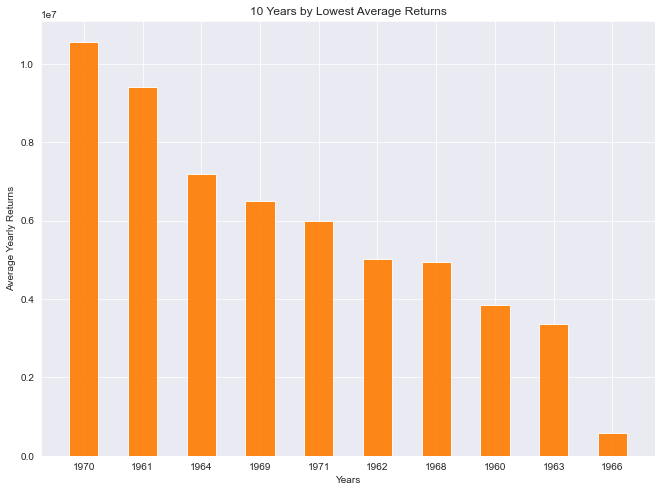

In [267]:
#create size for the plot
fig = plt.figure(figsize=(11,8))

#set location from 1-10, since we are after top 10 values
locations = np.arange(1,11)

#create labels for x-axis(year) by calling the function s_index()
labels= s_index(l_returns)

#create heights for each bar (returns) by calling the function s_values()
heights = s_value(l_returns)
    
#create a bar plot to visualize this result
plt.bar(locations, heights, tick_label=labels, width=0.5, color='#ff7c00', alpha=0.9)

#set title and labels
plt.title('10 Years by Lowest Average Returns')
plt.xlabel('Years')
plt.ylabel('Average Yearly Returns');

#### Year 1966 has the lowest yearly average returns

### Research Question 7: Number of Movies Produced per Month grouped by return

In [268]:
#checking for month with highest and lowest number of movie produced
df['release_month'].value_counts()

September    1331
October      1153
December      985
January       919
August        918
June          827
March         822
November      814
May           809
July          799
April         797
February      691
Name: release_month, dtype: int64

##### it can be seen here that highest number of movies is produced in September while the least number of movies is produce in February

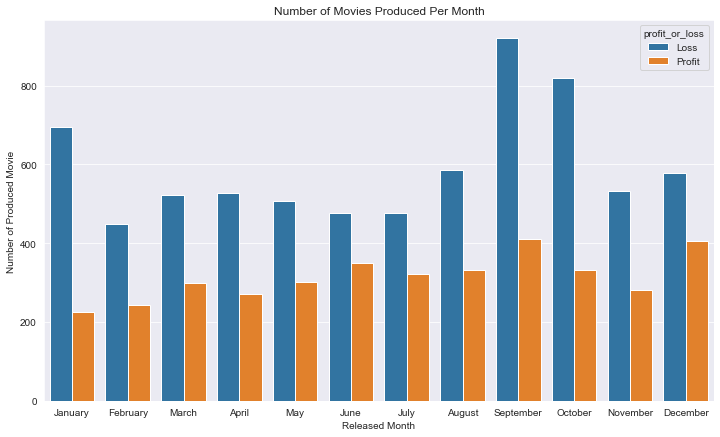

In [269]:
# create the size of plot
fig = plt.figure(figsize=(12,7))

# creating the plot to visualize the answer to the question
sns.countplot(x='release_month', data=df, hue='profit_or_loss')

# plot title and labels
plt.title('Number of Movies Produced Per Month')
plt.xlabel('Released Month')
plt.ylabel('Number of Produced Movie');

##### According to the above visualization, it shows the distribution of number of movies produced each month grouped by returns(profit or loss). As earlier said, month of september has the highest production number of movies while February has the least production numbers. However, it shows there are more movies with profitable returns compared to the loss each month. 

### Research Question 8: What is the correllation between the following Numberical Columns?

    >> Popularity
    >> Budget
    >> Runtime
    >> Vote_count
    >> Returns

In [270]:
#create a sub_dataset corr containing the columns

cor = df[['popularity', 'budget', 'runtime', 'vote_count', 'returns']]

#create correlation table corr
cor_table = cor.corr()

#print cor_table
cor_table

,popularity,budget,runtime,vote_count,returns
popularity,1.000000,0.545481,0.139032,0.800828,0.628997
budget,0.545481,1.000000,0.191300,0.632719,0.570222
runtime,0.139032,0.191300,1.000000,0.163273,0.136022
vote_count,0.800828,0.632719,0.163273,1.000000,0.755908
returns,0.628997,0.570222,0.136022,0.755908,1.000000


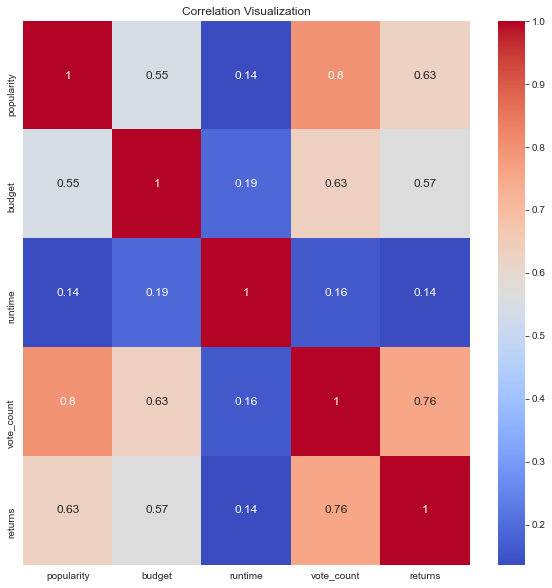

In [271]:
#visualizing the correlation using seaborn Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cor_table, cmap='coolwarm', annot=True, annot_kws = { 'fontsize' : 12 })
plt.title('Correlation Visualization');

This correlation chart shows the relationship between the represented columns. How they are related to one another other.

## Conclusion
After engaging in all the necessary and required steps from data inspection, cleaning and exploration. The folowing conclusions are be inferred.

- The number of Movies produced increases as the Year passes by, the lowest number Movies was produced in 1960, while the highest number of movies was produced in few years before 2015. A cause of this could have been technological advancement.
- There are more profitable production than loss. Over 7000 movies yield prositive returns(Profits) of investment which is over 50% of the total productions, while less than 4000 productions yield negative returns(Loss)
- The longer the runtime of a Movie, the returns is decreasing, 9 out of the ten longest movies yield negative returns(Loss).
- The more popular a movie is, there is tendency it will yield positive return. According to this dataset, the 10 most popular movies yield positive Returns. 
- The month of June has the highest average return followed by May and December. 
- The Year 1995 has the highest average yearly generated Returns while the year 1966 has lowest yearly average generated Returns.
- The month of September has the highest number of produced movies, in this month, most of the produced movies yield  more postively than negatively. While, the month of February has the lowest number of produced Movies, in this month also, most of the production yielded more positively (profits) than negatively(Loss).

- Correlated columns: The columns are correlatively checked, some has very strong correaltions while some also have low correlations, below explains that better:
    - Budget and Popularity (Moderately correlated)
    - Budget and Vote counts (Strong correlated)
    - Budget and Returns  (Moderately Correlated)
    - Popularity and Vote counts (Very Strong Correlation)
    - Vote counts and Return (Very Strong Correlation)
    - Returns and Popularity (Strong Correlation)
    - Popularity and Runtime (Low Correlation)
    - Budget and Runtime (Low Correlation)
    - Vote counts and Runtime (Low Correlation)
    - Returns and Runtime (Low Correlation

## Limitation
However, during the investigation of this Dataset, one or two hinderances are face. Those are listed below:

- No detailed explanation of the column names, like vote_average, budget_adj, revenue_adj
- Most of the columns with strings contains alot of null values which makes it harder to draw insights from them.
- Some of 'id' contain the same 'imdb_id'